## Data Science Academy

### Análise de Dados com Linguagem Python

#### Projeto 8

#### Engenharia de Atributos em Dados Médicos - Parte 1

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando os Dados e Compreendendo as Variáveis

In [2]:
# Carregando os dados
dados = pd.read_csv("dados/diabetic_data.csv")

In [3]:
# Shape
dados.shape

(101766, 50)

In [4]:
# Visualizando os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [6]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

#### Limpeza e Transformação dos Dados

In [7]:
# Verificando valores nulos
dados.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

In [8]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                         True
gender                      False
age                         False
weight                       True
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty            True
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                       True
diag_2                       True
diag_3                       True
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide 

In [9]:
# Verificando valores únicos
for col in list(dados.columns):
    
    # Obtém uma lista de valores únicos
    list_of_unique_values = dados[col].unique()
    
    # Se o número de valores exclusivos for menor que 15, imprima os valores.
    # Caso contrário, imprima o número de valores exclusivos
    if len(list_of_unique_values) < 15:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')
        print(list_of_unique_values)
    else:
        print("\n")
        print(col + ': ' + str(len(list_of_unique_values)) + ' valores únicos')



encounter_id: 101766 valores únicos


patient_nbr: 71518 valores únicos


race: 6 valores únicos
['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']


gender: 3 valores únicos
['Female' 'Male' 'Unknown/Invalid']


age: 10 valores únicos
['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']


weight: 10 valores únicos
['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']


admission_type_id: 8 valores únicos
[6 1 2 3 4 5 8 7]


discharge_disposition_id: 26 valores únicos


admission_source_id: 17 valores únicos


time_in_hospital: 14 valores únicos
[ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]


payer_code: 18 valores únicos


medical_specialty: 73 valores únicos


num_lab_procedures: 118 valores únicos


num_procedures: 7 valores únicos
[0 5 1 6 2 3 4]


num_medications: 75 valores únicos


number_outpatient: 39 valores únicos


number_emergency: 33 valores únicos


number_inpati

    O caracter '?' nada mais é do que valor ausente. Vamos limpar isso.

In [10]:
# Vamos verificar a quantidade e percentual de registros onde o valor é igual a '?'
for col in dados.columns:
    if dados[col].dtype == object:
        if dados[col][dados[col] == '?'].count() > 0:
            print('\nColuna', col, 'tem', dados[col][dados[col] == '?'].count(), 'valores com o caracter "?"')
            print('Isso representa', round(dados[col][dados[col] == '?'].count() / len(dados.index) * 100, 2), '% do total')


Coluna race tem 2273 valores com o caracter "?"
Isso representa 2.23 % do total

Coluna weight tem 98569 valores com o caracter "?"
Isso representa 96.86 % do total

Coluna payer_code tem 40256 valores com o caracter "?"
Isso representa 39.56 % do total

Coluna medical_specialty tem 49949 valores com o caracter "?"
Isso representa 49.08 % do total

Coluna diag_1 tem 21 valores com o caracter "?"
Isso representa 0.02 % do total

Coluna diag_2 tem 358 valores com o caracter "?"
Isso representa 0.35 % do total

Coluna diag_3 tem 1423 valores com o caracter "?"
Isso representa 1.4 % do total


In [11]:
# A coluna gender também apresenta um valor que precisamos tratar
print('\nColuna gender tem', dados['gender'][dados['gender'] == 'Unknown/Invalid'].count(), 'valores com Unknown/Invalid')
print('Isso representa', round(dados['gender'][dados['gender'] == 'Unknown/Invalid'].count() / len(dados.index) * 100, 2), ' % do total')


Coluna gender tem 3 valores com Unknown/Invalid
Isso representa 0.0  % do total


#### Agora a parte importante - decidir o que fazer!
    - Falta os dados sobre peso do paciente em mais de 96% dos registros.
    - O código do pagador e a especialidade médica também apresentam valores ausentes de 40 a 50%.
    - As demais variáveis apresentam um baixo percentual de valores ausentes.

#### Alternativas:
    - Colocar a variável peso como categórica com dois labels: disponível / não disponível (1 e 0)
    - Criar um código genérico para a variável payer_code como 99 e preencher os valores ausentes
    - Criar um tipo genérico para a variável medical_specialty como 'Sem Especialidade Definida' e preencher os valores ausentes.
    - Para a variável gender são apenas 3 registros e o ideal é removê-los.
    
#### Decisão:
    -> 1: Devido á fraca interpretabilidade dos valores ausentes da variável peso, o melhor é simplesmente ignorar a variável e removê-la.
    -> 2: Vamos descartar as variáveis payer_code e medical_specialty, pois seria difícil tratar quantidade muito grande de valores ausentes.
    -> 3: Vamos remover os registros "?" das demais variáveis.
    -> 4: Para a variável gender vamos remover os 3 registros com categoria "Unknown/invalid"

In [12]:
# Removendo as 3 colunas com alto percentual de valores ausentes
dados = dados.drop(['weight', 'payer_code', 'medical_specialty'], axis = 1)

Para as demais variaveis com baixo percentual de valores ausentes, removemos os registros


In [13]:
# Removemos os registros com baixo percentual de valores ausentes
dados = dados[dados['race'] != '?']
dados = dados[dados['diag_1'] != '?']
dados = dados[dados['diag_2'] != '?']
dados = dados[dados['diag_3'] != '?']
dados = dados[dados['gender'] != 'Unknown/Invalid']

In [14]:
# Checando as colunas que tem valor = '?'
dados.isin(['?']).any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide                   False
glyburide                   False
tolbutamide   

In [15]:
# Shape
dados.shape

(98052, 47)

Sera que temos variaveis com um unico valor?

In [16]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,Steady,No,No,No,No,No,No,Yes,>30


In [17]:
# Checando por variaveis com um unico valor
dados.loc[:, dados.nunique() == 1]

,examide,citoglipton,metformin-rosiglitazone
1,No,No,No
2,No,No,No
3,No,No,No
4,No,No,No
5,No,No,No
...,...,...,...
101761,No,No,No
101762,No,No,No
101763,No,No,No
101764,No,No,No


Vamos eliminar as colunas que tem apenas 1 valor unico, pois elas nao adicionam nada a nossa analise

In [18]:
# Removendo variaveis com valores unicos
dados = dados.loc[:, dados.nunique() != 1]

In [19]:
# Shape
dados.shape

(98052, 44)

### Engenharia de Atributos

#### Ajustando a Variavel Alvo Para Estratificacao de Risco

Uma readmissao hospitalar ocorre quando um paciente que recebe alta do hospital e readmitido novamente dentro de um certo periodo de tempo. As taxas de readmissao hospitalar para certas condicoes agora sao considaradas um indicador da qualidade do hospital e tambem afetam negativamente o custo medico.

Nossa variavel e 'readmitted'. Queremos saber se um paciente sera readmitido no hospital ou nao.

A variavel possui os valores
-- <30 (readmissao em menos de 30 dias)
-- >30 (readmissao em mais de 30 dias)
-- No (sem readmissao)

Nos podemos combinar a readmissao antes de 30 dias e apos 30 dias em uma categoria (valor 1 - classe positiva) e nenhuma readmissao em outra categoria (valor 0 - classe negativa) para tornar nosso problema classificacao binaria.

In [20]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,>30


In [21]:
dados['readmitted'].value_counts()

NO     52337
>30    34649
<30    11066
Name: readmitted, dtype: int64

In [22]:
# Primeiro vamos criar uma copia do dataset ate aqui
dados_clean1 = dados

# Se precisar voltar a este ponto, apenas execute
# dados = dados_clean1

# Assim nao tera que executar todo jupyter notebook ate aqui

In [23]:
# Ajustando a variavel alvo
# '0' significa que nao foi readmitido
# '1' significa que foi readmitido, nao importa quantos dias apos a alta

dados['readmitted'] = dados['readmitted'].replace('>30', 1)
dados['readmitted'] = dados['readmitted'].replace('<30', 1)
dados['readmitted'] = dados['readmitted'].replace('NO', 0)

In [24]:
# Verifica os valores unicos
dados['readmitted'].unique()

array([1, 0], dtype=int64)

In [25]:
# Checa o tipo de dado
dados['readmitted'].dtype

dtype('int64')

In [26]:
# Verifica a proporcao de cada classe
round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

0    53.0
1    47.0
Name: readmitted, dtype: float64

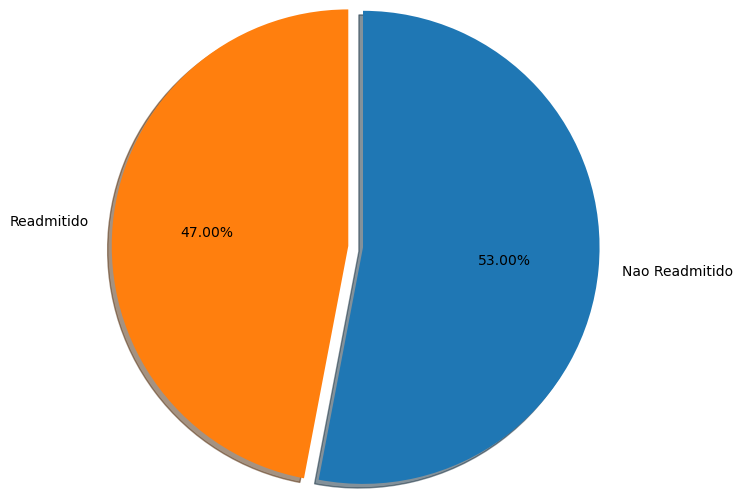

In [27]:
# Vamos visualizar de forma grafica

# Percentual de cada valor da variavel alvo
percentual = round(dados.readmitted.value_counts() / len(dados.index) * 100, 0)

# Labels
labels = ['Nao Readmitido', 'Readmitido']

# Plot
plt.axis("equal")
plt.pie(percentual,
        labels = labels,
        radius = 1.6,
        autopct = '%1.2f%%',
        explode = [0.05, 0.05],
        startangle = 90,
        shadow = True,
        counterclock = False,
        pctdistance = 0.6)
plt.show()

Cerca de 47% dos pacientes de diabetes foram readmitidos nos hospitais

### Recategorizacao da Variavel

Como tratamos a variavel idade?

In [28]:
# Tipo da variavel
dados.age.dtype

dtype('O')

In [29]:
# Total de pacientes por faixa etaria
dados.groupby('age').size()

age
[0-10)         65
[10-20)       466
[20-30)      1478
[30-40)      3548
[40-50)      9265
[50-60)     16697
[60-70)     21809
[70-80)     25305
[80-90)     16702
[90-100)     2717
dtype: int64

Text(0, 0.5, 'count')

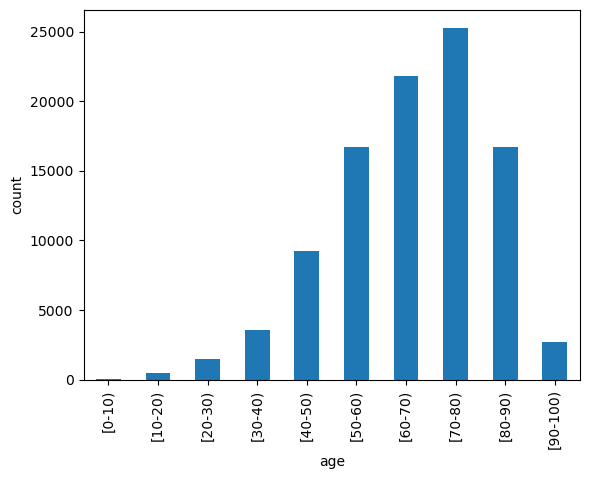

In [30]:
# Vamos verificar a variavel que representa a faixa etaria dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('count')

Podemos perceber que a maioria dos pacientes está na faixa entre 50 e 90 anos.

Existem diferentes maneiras de lidar com essa variável. O conjunto de dados nos dá a idade apenas como categorias nas faixas de 10 anos, portanto, não sabemos a idade exata de cada paciente.

Podemos adotar duas abordagens:

1- Se queremos ver o efeito do aumento da idade na readmisão do paciente, mesmo que de maneira grosseira, podemos assumir que a idade do paciente, em média, esteja no ponto médio da categoria idade. Por exemplo, se a categoria de idade do paciente é de 20 a 30 anos, assumimos a idade = 25 anos. Então, convertemos categorias de idades em pontos médios, resultando em variáveis numérica.

2 - Podemos recategorizar a variável, distribuindo os pacientes por número menor de faixas e manter a variavel como categórica. Nesse caso, poderíamos avaliar o risco por faixa etária e não por idade.

Adotaremos a opção 2 pois altera menos a informação contida nos dados.

In [31]:
# Recategorizamos 'idade' para que a população seja distrubuída de maneira mais uniforme

# Classificamos como faixa de 0-50 pacientes de até 50 anos
dados['age'] = pd.Series(['[0-50)' if val in ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)'] else val
                         for val in dados['age']], index = dados.index)

# Acima de 80 anos ficam na faixa de 80-100
dados['age'] = pd.Series(['[80-100)' if val in ['[80-90)', '[90-100)'] else val
                         for val in dados['age']], index = dados.index)

# As outras faixas são mantidas

In [32]:
# Tipo da variavel
dados.age.dtype

dtype('O')

Text(0, 0.5, 'Count')

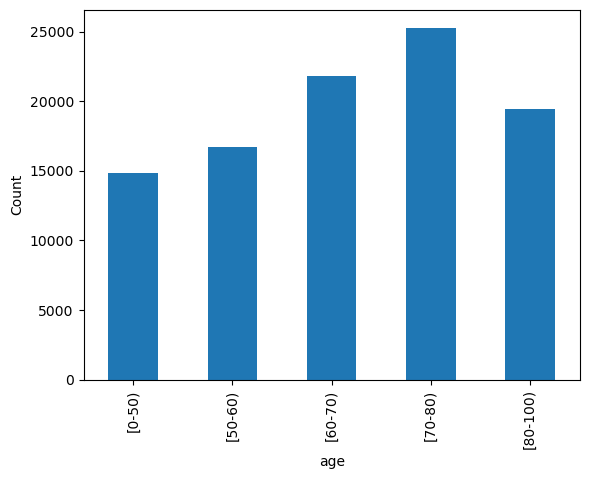

In [33]:
# Vamos verificar a variável que representa a faixa etária dos pacientes
dados.groupby('age').size().plot(kind = 'bar')
plt.ylabel('Count')

Como tratamos variáveis do tipo ID? Seguiremos com a Recategorização de Variável.

Uma análise mais detalhada do arquivo IDs_mapping.csv revelará que 'admission_type_id', 'harge_disposition_id' e 'admission_source_id' tem valores com significado semelhante. Eles podem ser mesclados para ter menos valores.

In [34]:
# Visualiza
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
1,149190,55629189,Caucasian,Female,[0-50),1,1,7,3,59,...,No,No,Up,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[0-50),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[0-50),1,1,7,2,44,...,No,No,Up,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[0-50),1,1,7,1,51,...,No,No,Steady,No,No,No,No,Ch,Yes,0
5,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,31,...,No,No,Steady,No,No,No,No,No,Yes,1


###### Variável admission_type_id

In [35]:
dados.admission_type_id.unique()

array([1, 2, 3, 6, 4, 5, 8, 7], dtype=int64)

In [36]:
dados.admission_type_id.nunique()

8

In [37]:
# A variável 'admission_type_id' contém 8 níveis
# Reduziremos os níveis de 'admission_type_id' para duas categorias
dados['admission_type_id'] = pd.Series(['Emergencia' if val == 1 else 'Outro'
                                       for val in dados['admission_type_id']], index = dados.index)

In [38]:
dados.admission_type_id.nunique()

2

In [39]:
dados.admission_type_id.value_counts()

Emergencia    52178
Outro         45874
Name: admission_type_id, dtype: int64

###### Variável discharge_disposition_id

In [40]:
dados.discharge_disposition_id.unique()

array([ 1,  3,  6,  2,  5, 11,  7, 25, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27], dtype=int64)

In [41]:
dados.discharge_disposition_id.nunique()

26

In [42]:
# A variável 'discharge_disposition_id' contém 26 níveis
# Reduziremos os níveis de 'discharge_disposition_id' para duas categorias
dados['discharge_disposition_id'] = pd.Series(['Casa' if val == 1 else 'Outro'
                                               for val in dados ['discharge_disposition_id']], index = dados.index)

In [43]:
dados.discharge_disposition_id.nunique()

2

In [44]:
dados.discharge_disposition_id.value_counts()

Casa     57609
Outro    40443
Name: discharge_disposition_id, dtype: int64

 ##### Variável admission_source_id

In [45]:
dados.admission_source_id.unique()

array([ 7,  2,  4,  1,  5,  6, 20,  3, 17,  8,  9, 14, 10, 22, 11, 25, 13],
      dtype=int64)

In [46]:
dados.admission_source_id.nunique()

17

In [47]:
# A variável 'admission_source_id' contém 17 níveis
# Reduziremos os níveis de 'admission_source_id' para duas categorias
dados['admission_source_id'] = pd.Series(['Sala_Emergencia' if val == 7 else 'Recomendacao' if val == 1 else 'Outro'
                                         for val in dados['admission_source_id']], index = dados.index)


In [48]:
dados.admission_source_id.nunique()

3

In [49]:
dados.admission_source_id.value_counts()

Sala_Emergencia    55951
Recomendacao       28355
Outro              13746
Name: admission_source_id, dtype: int64

Como tratamos as variáveis 'diag_1', 'diag_2' e 'diag_3' que representam o diagnóstico médicos?

O conjunto de dados contém até tres diagnósticos para um determinado paciente (primário, secundário e adicional).

No entanto, cada um deles tem códigos CID-9 exclusivos e é extremamente difícil incluí-los no modelo e interpretar de forma significativa.

Portanto, reduziremos esses códigos de diagnósticos para 4 categorias.

Códigos ICD-9 (International Classification of Diseases ou Código Internacional de Doenças):

https://en.wikipedia.org/wiki/List_of_ICD-9_codes

http://www.icd9data.com/2013/Volume1/default.htm

https://icd.codes/icd9cm

https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes

In [50]:
# Concatena 3 variáveis em um dataframe
diagnostico = dados[['diag_1', 'diag_2', 'diag_3']]

In [51]:
# Visualiza os dados
diagnostico.head()

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250


In [52]:
diagnostico.isnull().any()

diag_1    False
diag_2    False
diag_3    False
dtype: bool

##### Calculando a Comorbidade

Defining Comorbidity: Implications for Understanding Health and Health Services:

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2713155/

Comorbidity: Substance Use Disorders and Other Mental llinesses:

https://www.drugabuse.gov/publications/drugfacts/comorbidity-substance-use-disorders-other-mental-illnesses


Em termos simples, comordidade refere-se á presença de mais de um distúrbio na mesma pessoa. Por exemplo, se uma pessoa é diagnosticada com transtorno de ansiedade social (SAD) e transtorno depressivo maior (MDD), diz-se que ela possui transtornos depressivos e ansiosos comórbidos (significando de coexistentes).

Outras condições que parecem se sobrepor incluem doenças físicas como diabetes, doenças cardiovasculares, cancer, doenças infecciosas e demencia. Os transtornos mentais que tendem a mostrar comorbidade também incluem transtornos alimentares, transtornos de ansiedade e abuso de substancias.

Não é incomum que as pessoas sofram de dois distúrbios ou doenças ao mesmo tempo. A comorbidade na doença mental pode incluir uma situação em que a pessoa recebe um diagnóstico médico seguido pelo diagnóstico de um transtorno mental (ou vice-versa) ou pode envolver o diagnóstico de um transtorno mental seguido pelo diagnóstico de outro transtorno mental.

Um grande estudo epidemiológico nacional transversal de 2009 sobre comorbidade de transtornos mentais na atenção primária na Espanha, publicado no Journal of Affective Disorders, mostrou que entre uma amostra de 7936 pacientes adultos, cerca da metade tinha mais de um distúrbio psiquiátrico

Prevalence and comorbidity of common mental disorders in primary care

Além disso, uma Pesquisa Nacional de Comorbidade dos EUA, 51% dos pacientes com diagnóstico de depressão também tiveram pelo menos um transtorno de ansiedade e apenas 26% deles não tiveram nenhum outro transtorno mental. No entanto, no Estágio inicial de Desenvolvimento da Psicopatologia, 48,6% dos pacientes com diagnóstico de depressão também apresentaram pelo menos um transtorno de ansiedade e 34,8% deles não possuíam outro transtorno mental.

'Psychiatric comorbidity': an artefact of current diagnostic systems?

In [53]:
# Vamos aplicar expressões regulares para buscar por um padrão e por isso precisamos do pacote re
import re

Acesse o site abaixo para buscar detalhes sobre os padrões de expressões regulares em Python

https://www.w3schools.com/python_regex.asp

In [54]:
# Visualiza os dados
diagnostico.head(10)

,diag_1,diag_2,diag_3
1,276,250.01,255
2,648,250,V27
3,8,250.43,403
4,197,157,250
5,414,411,250
6,414,411,V45
7,428,492,250
8,398,427,38
9,434,198,486
10,250.7,403,996


In [55]:
# Função que calcula a Comorbidade
def calcula_comorbidade(row):
    
    # Código 250 indica diabetes
    codigos_doenca_diabetes = "^[2][5][0]"
    
    # Códigos 39x (x = valor entre 0 e 9)
    # Códigos 4zx (z = valor entre 0 e 6 e x = valor entre 0 e 9)
    # Esses códigos indicam problemas circulatórios
    codigos_doenca_circulatorios = "^[3][9][0-9]|^[4][0-5][0-9]"
    
    # Inicializa variável de retorno
    valor = 0
    
    # Valor 0 indica que:
    # Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))):
        valor = 0
        
    # Valor 1 indica que:
    # Pelo menos um diagnóstico de diabetes e problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2']))))) and not(
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3'])))))): 
        valor = 1
        
    # Valor 2 indica que:
    # Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma 
    # simultânea no paciente
    if(not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1']))))) and
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2']))))) and 
       not(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3'])))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 2
        
    # Valor 3 indica que:
    # Pelo menos um diagnóstico de diabetes e pelo menos um diagnóstico de problemas circulatórios 
    # foram detectados de forma simultânea no paciente
    if(bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_1'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_2'])))) or 
       bool(re.match(codigos_doenca_diabetes, str(np.array(row['diag_3']))))) and (
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_1'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_2'])))) or 
        bool(re.match(codigos_doenca_circulatorios, str(np.array(row['diag_3']))))):
        valor = 3 
    
    return valor

Aplicamos a função aos dados

In [56]:
%%time
dados['comorbidade'] = diagnostico.apply(calcula_comorbidade, axis = 1)

Wall time: 6.27 s


In [57]:
# Shape
dados.shape

(98052, 45)

In [58]:
# Visualiza os dados
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


In [59]:
# Valores unicos 
dados['comorbidade'].value_counts()

2    39551
0    22645
1    18192
3    17664
Name: comorbidade, dtype: int64

In [60]:
# Drop das variaveis individuais
dados.drop(['diag_1', 'diag_2', 'diag_3'], axis = 1, inplace = True)

In [61]:
# Calcula o percentual de comorbidade por tipo e por classe da variavel alvo
percent_com = pd.crosstab(dados.comorbidade, dados.readmitted, normalize = 'index') * 100
percent_com

readmitted,0,1
comorbidade,,
0,55.526606,44.473394
1,53.875330,46.124670
2,51.748376,48.251624
3,53.753397,46.246603


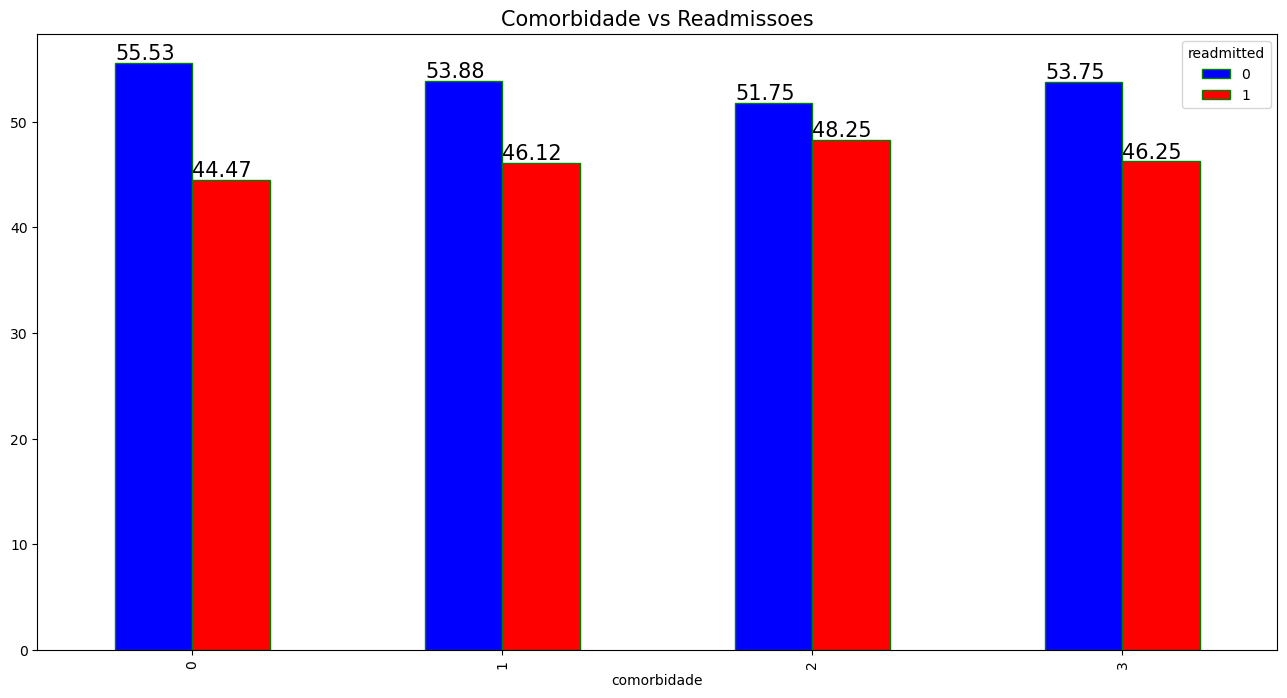

In [62]:
# Plot 

# Prepara a figura a partir dos dados
fig = percent_com.plot(kind = 'bar',
                       figsize = (16, 8),
                       width = 0.5,
                       edgecolor = 'g',
                       color = ['b', 'r']
                      )

# Desenha cada grupo
for i in fig.patches:
    fig.text(i.get_x() + 0.00,
             i.get_height() + 0.3,
             str(round((i.get_height()), 2)),
             fontsize = 15,
             color = 'black',
             rotation = 0
            )
    
# Titulo e Print
plt.title("Comorbidade vs Readmissoes", fontsize = 15)
plt.show()

In [63]:
# Legenda do gráfico:

# Valor 0 indica que:
# Diabetes e problemas circulatórios não foram detectados de forma simultânea no paciente

# Valor 1 indica que:
# Pelo menos um diagnóstico de diabetes E problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 2 indica que:
# Diabetes e pelo menos um diagnóstico de problemas circulatórios foram detectados de forma simultânea no paciente

# Valor 3 indica que:
# Pelo menos um diagnóstico de diabetes e pelo menos um dianóstico de problemas circulatórios foram detectados de 
# forma simultânea no paciente

#### Variaveis de Dosagem de Medicamentos e Agrupamento de Variaveis

Verificando nosso conjunto de dados ate aqui

In [64]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,No,Up,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,No,Up,No,No,No,No,Ch,Yes,0,3
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,No,Steady,No,No,No,No,Ch,Yes,0,1
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,No,Steady,No,No,No,No,No,Yes,1,3


 O conjunto de dados contem 23 recursos para 23 medicamentos que indicam, para cada um deles, se uma alteracao no medicamento foi feita ou nao durante a atual internacao do paciente.
 
Vamos plotar algumas variaveis que indicam uso de medicamento

Text(0, 0.5, 'Count')

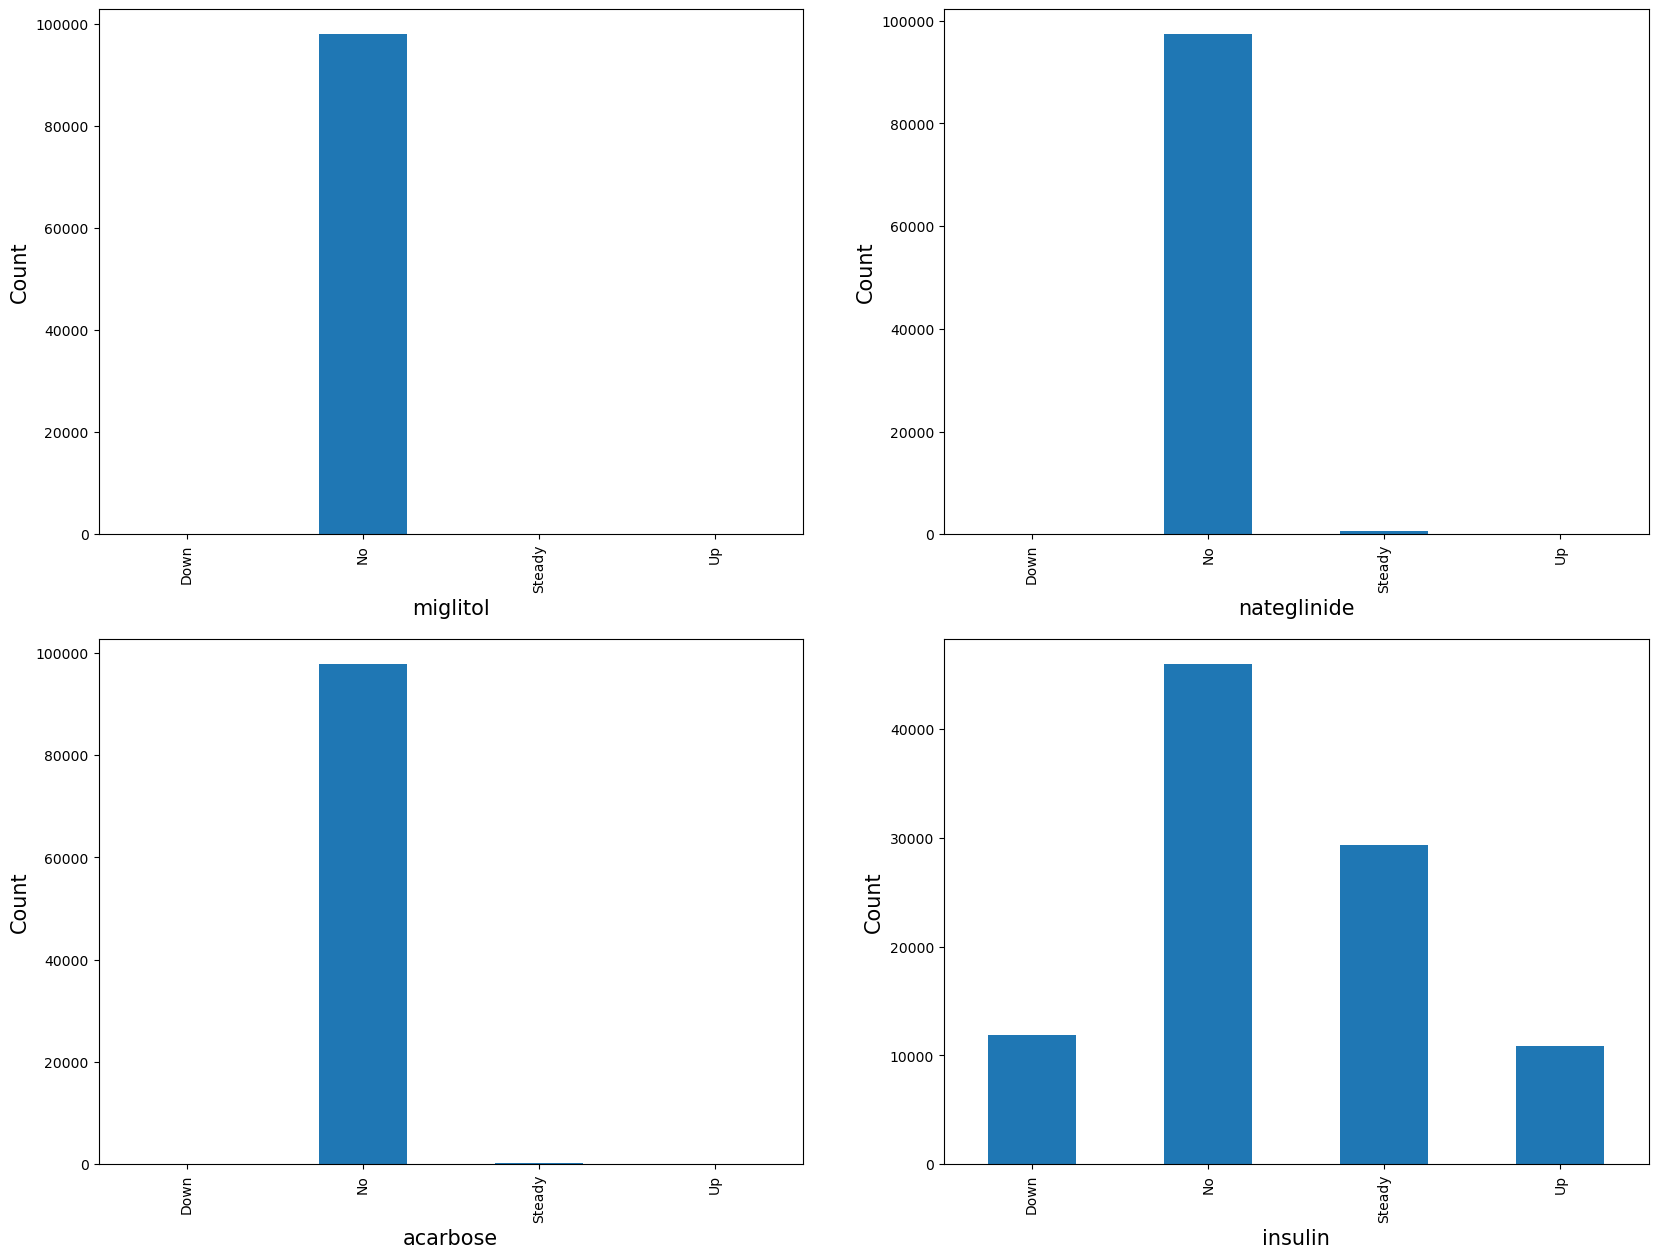

In [66]:
# Plot

fig = plt.figure(figsize = (20, 15))

ax1 = fig.add_subplot(221)
ax1 = dados.groupby('miglitol').size().plot(kind = 'bar')
plt.xlabel('miglitol', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax2 = fig.add_subplot(222)
ax2 = dados.groupby('nateglinide').size().plot(kind = 'bar')
plt.xlabel('nateglinide', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax3 = fig.add_subplot(223)
ax3 = dados.groupby('acarbose').size().plot(kind = 'bar')
plt.xlabel('acarbose', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

ax4 = fig.add_subplot(224)
ax4 = dados.groupby('insulin').size().plot(kind = 'bar')
plt.xlabel('insulin', fontsize = 15)
plt.ylabel('Count', fontsize = 15)


Podemos contar quantas alterações foram feitas no total para cada paciente e criamos um novo atributo. Isso pode ajudar a descobrir uma relação com o número de alteraçoes independente de qual medicamento foi alterado

In [67]:
# Shape
dados.shape

(98052, 42)

In [68]:
dados.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-pioglitazone', 'change',
       'diabetesMed', 'readmitted', 'comorbidade'],
      dtype='object')

In [69]:
# Lista com os nomes das variáveis de medicamentos (3 variáveis já tinham sido removidas)
medicamentos = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 
                'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
                'glimepiride-pioglitazone', 'metformin-pioglitazone']

In [70]:
# Loop para ajustar o valor das variáveis
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados[colname] = dados[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)

In [71]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,rosiglitazonetemp,acarbosetemp,miglitoltemp,troglitazonetemp,tolazamidetemp,insulintemp,glyburide-metformintemp,glipizide-metformintemp,glimepiride-pioglitazonetemp,metformin-pioglitazonetemp
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,0,0,0,0,1,0,0,0,0
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,0,0,0,0,0,0,0,0,0,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,0,0,0,0,1,0,0,0,0
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,0,0,0,0,0,0,0,0,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Cria uma variável para receber a contagem por paciente
dados['num_alt_dosagem_med'] = 0

In [73]:
# Contagem de modificações na dosagem de medicamentos
for col in medicamentos:
    if col in dados.columns:
        colname = str(col) + 'temp'
        dados['num_alt_dosagem_med'] = dados['num_alt_dosagem_med'] + dados[colname]
        del dados[colname]

In [74]:
# Verifica o total por modificações na dosagem de medicamentos
dados.num_alt_dosagem_med.value_counts()

0    71309
1    25350
2     1281
3      107
4        5
Name: num_alt_dosagem_med, dtype: int64

In [75]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,Up,No,No,No,No,Ch,Yes,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,No,No,No,No,No,No,Yes,0,1,0
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,Up,No,No,No,No,Ch,Yes,0,3,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,Steady,No,No,No,No,Ch,Yes,0,1,0
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,Steady,No,No,No,No,No,Yes,1,3,0


Vamos alterar o valor das colunas dos medicamentos para refletir se esse medicamento está sendo administrado a um paciente ou não.

In [76]:
# Recoding das colunas de medicamentos
for col in medicamentos:
    if col in dados.columns:
        dados[col] = dados[col].replace('No', 0)
        dados[col] = dados[col].replace('Steady', 1)
        dados[col] = dados[col].replace('Up', 1)
        dados[col] = dados[col].replace('Down', 1)

Agora, criamos mais de uma coluna para refletir quantos medicamentos estão sendo administrados a um paciente

In [77]:
# Variavel com a contagem de medicamentos por paciente
dados['num_med'] = 0 

In [78]:
# Carregando a nova variável 
for col in medicamentos:
    if col in dados.columns:
        dados['num_med'] = dados['num_med'] + dados[col]

In [79]:
# Verifica o total de medicamentos
dados['num_med'].value_counts()

1    45447
0    22702
2    21056
3     7485
4     1300
5       57
6        5
Name: num_med, dtype: int64

Depois de criar essas duas colunas, podemos remover as colunas dos medicamentos

In [80]:
# Remove as colunas de medicamentos
dados = dados.drop(columns = medicamentos)

In [81]:
# Shape
dados.shape

(98052, 24)

In [82]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,Female,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,None,None,Ch,Yes,1,1,1,1
2,64410,86047875,AfricanAmerican,Female,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,None,None,No,Yes,0,1,0,1
3,500364,82442376,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,None,None,Ch,Yes,0,3,1,1
4,16680,42519267,Caucasian,Male,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,None,None,Ch,Yes,0,1,0,2
5,35754,82637451,Caucasian,Male,[50-60),Outro,Casa,Outro,3,31,...,0,9,None,None,No,Yes,1,3,0,1


In [85]:
# Variaveis
dados.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id           object
discharge_disposition_id    object
admission_source_id         object
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
change                      object
diabetesMed                 object
readmitted                   int64
comorbidade                  int64
num_alt_dosagem_med          int64
num_med                      int64
dtype: object

#### Recoding de variáveis categoricas

Vamos fazer o recoding de algumas variáveis categóricas

In [86]:
dados['change'].value_counts()

No    52774
Ch    45278
Name: change, dtype: int64

In [87]:
dados['gender'].value_counts()

Female    52833
Male      45219
Name: gender, dtype: int64

In [88]:
dados['diabetesMed'].value_counts()

Yes    75350
No     22702
Name: diabetesMed, dtype: int64

In [89]:
# Recoding de variaveis categoricas binarias
dados['change'] = dados['change'].replace('Ch', 1)
dados['change'] = dados['change'].replace('No', 0)
dados['gender'] = dados['gender'].replace('Male', 1)
dados['gender'] = dados['gender'].replace('Female', 0)
dados['diabetesMed'] = dados['diabetesMed'].replace('Yes', 1)
dados['diabetesMed'] = dados['diabetesMed'].replace('No', 0)

In [90]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,None,None,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,None,None,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,None,None,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,None,None,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,None,None,0,1,1,3,0,1


Também reduzimos o resultado do teste A1C e o resultado de teste sérico da glicose em categorias de Normal, Anormal e Não Testado, com valores 1, 0 e -99, respectivamente

In [91]:
dados['A1Cresult'].value_counts()

None    81859
>8       7631
Norm     4854
>7       3708
Name: A1Cresult, dtype: int64

In [92]:
dados['max_glu_serum'].value_counts()

None    92844
Norm     2532
>200     1449
>300     1227
Name: max_glu_serum, dtype: int64

In [93]:
# Recoding de variaveis categorica (label enconding)
dados['A1Cresult'] = dados['A1Cresult'].replace('>7', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('>8', 1)
dados['A1Cresult'] = dados['A1Cresult'].replace('Norm', 0)
dados['A1Cresult'] = dados['A1Cresult'].replace('None', -99)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>200', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('>300', 1)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('Norm', 0)
dados['max_glu_serum'] = dados['max_glu_serum'].replace('None', -99)

In [94]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


Alguns pacientes no conjunto de dados tiveram mais de um encontro (consulta). 

Não podemos contá-los como encontros independentes, porque isso influencia os resultados para aqueles pacientes que tiveram vários encontros. Assim, tentamos várias técnicas para recolher e consolidar vários encontros para o mesmo paciente, como:

- Considerar a permanência média no hospital em vários encontros.
- Considerar a porcentagem de alterações na medicação em vários encontros.
- Considerar o número total de encontros para substituir o ID exclusivo do encontro.
- Considerar a combinação de diagnósticos em vários encontros como uma lista.

Por fim, o ideal foi deixar apenas um registro de encontro para cada paciente e optamos por manter o primeiro.

In [96]:
# Removendo duplicidade por id de paciente, mantendo o primeiro registro
dados = dados.drop_duplicates(subset = ['patient_nbr'], keep = 'first')

In [98]:
# Shape
dados.shape

(68629, 24)

In [99]:
dados.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,change,diabetesMed,readmitted,comorbidade,num_alt_dosagem_med,num_med
1,149190,55629189,Caucasian,0,[0-50),Emergencia,Casa,Sala_Emergencia,3,59,...,0,9,-99,-99,1,1,1,1,1,1
2,64410,86047875,AfricanAmerican,0,[0-50),Emergencia,Casa,Sala_Emergencia,2,11,...,1,6,-99,-99,0,1,0,1,0,1
3,500364,82442376,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,2,44,...,0,7,-99,-99,1,1,0,3,1,1
4,16680,42519267,Caucasian,1,[0-50),Emergencia,Casa,Sala_Emergencia,1,51,...,0,5,-99,-99,1,1,0,1,0,2
5,35754,82637451,Caucasian,1,[50-60),Outro,Casa,Outro,3,31,...,0,9,-99,-99,0,1,1,3,0,1


In [100]:
# Salvando o dataset
dados.to_csv('dados_partel.csv', index = False)

### Fim